In [ ]:
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=a58a52b31d9d8faf9532b25bf4bc0b07c6d66ab6c0fb214571426553ad9b3f3c
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import os
import face_recognition
import pandas as pd

In [ ]:
base_path = '/content/drive/MyDrive/ml-project/'
train_path = base_path + 'Friends-face/Train'
test_path = base_path + 'Friends-face/Test'

In [ ]:
def get_features(path):
    image = face_recognition.load_image_file(path)
    face_features = face_recognition.face_encodings(image)

    if len(face_features):
        features = {}
        for i, feature in enumerate(face_features[0]):
            features["feature_{}".format([i])] = feature
        return features
    return False

In [ ]:
df = pd.DataFrame([])
people = [p for p in os.listdir(train_path) if os.path.isdir("{}/{}".format(train_path, p))]
for person in people:
    files = os.listdir("{}/{}".format(train_path, person))
    print("Processing {}".format(person))
    for file in files:
        path = train_path + '/{}/{}'.format(person, file)
        if path.endswith('.jpeg') or path.endswith('.jpg') or path.endswith('.png'):
            newRow = get_features(path)
            if newRow:
                newRow['label'] = person
                df = df.append([newRow])
            else:
                print("No face found on Train/{}/{}".format(person, file))
        else:
            print('No image file in /{}/{}'.format(person, file))

Processing Chandler
Processing Ross
Processing Rachel
Processing Phoebe
No image file in /Phoebe/phoebe (1).gif
Processing Joey
Processing Monica


In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,feature_[0],feature_[1],feature_[2],feature_[3],feature_[4],feature_[5],feature_[6],feature_[7],feature_[8],feature_[9],...,feature_[119],feature_[120],feature_[121],feature_[122],feature_[123],feature_[124],feature_[125],feature_[126],feature_[127],label
0,-0.170883,0.121940,0.019783,0.002243,-0.197132,-0.057859,0.023812,-0.180601,0.115739,-0.035569,...,0.030838,-0.032516,0.145538,-0.044210,-0.120619,0.074080,0.014234,0.039409,0.141411,Chandler
1,-0.158059,0.161935,0.072488,-0.026376,-0.204080,-0.094218,-0.041937,-0.080530,0.103607,-0.028576,...,0.016105,-0.042474,0.028332,-0.154167,-0.086552,0.096296,-0.028523,0.064775,0.067504,Chandler
2,-0.153146,0.122785,0.073606,0.001227,-0.190406,-0.043236,-0.005226,-0.067083,0.148696,-0.045434,...,0.020206,-0.030599,0.129306,-0.140236,-0.098316,0.015414,-0.030068,0.073614,0.141493,Chandler
3,-0.174099,0.102350,0.133694,0.009448,-0.141463,-0.048661,0.004600,-0.139358,0.130711,-0.024871,...,0.001145,-0.055098,0.083798,-0.062615,-0.079613,0.075647,-0.072750,0.073513,0.128921,Chandler
4,-0.186424,0.152597,0.119026,-0.053153,-0.193692,0.013849,-0.019806,-0.117700,0.112654,0.015079,...,0.029503,-0.029128,0.081301,-0.085245,-0.063653,0.018482,-0.062745,0.042710,0.144944,Chandler


In [ ]:
# generating the model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(columns=['label'])
y = df.label

le = preprocessing.LabelEncoder()
y_numeric = le.fit_transform(y)
y_numeric

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_numeric,
    test_size=0.2,
    random_state=123
)


print(X.shape,y.shape)

(297, 128) (297,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test),
    "match": le.inverse_transform(y_pred) == le.inverse_transform(y_test)
})

,pred,real,match
0,Ross,Ross,True
1,Rachel,Rachel,True
2,Rachel,Rachel,True
3,Monica,Monica,True
4,Monica,Monica,True
5,Joey,Joey,True
6,Chandler,Chandler,True
7,Phoebe,Phoebe,True
8,Chandler,Chandler,True
9,Joey,Joey,True


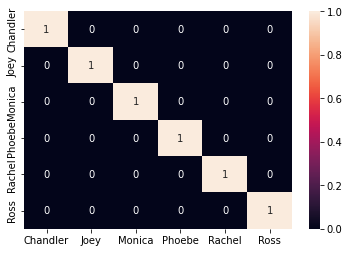

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_,)

In [ ]:
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt

In [ ]:
def get_faces(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    faces = []
    for i, face in enumerate(face_locations):
        top, right, bottom, left = face
        faces.append(image[top:bottom, left:right])
    return faces

def show_faces(path):
    faces = get_faces(path)
    plt.figure(figsize=(22,20))
    for i, face in enumerate(faces):
        plt.subplot(10, 6, i+1)
        plt.imshow(face)
        plt.axis('off')

In [ ]:
def get_predict_features(image, is_image):
    if not is_image:
        image = face_recognition.load_image_file(image)
    face_features = face_recognition.face_encodings(image)
    df_predicted = pd.DataFrame([])
    for face_feature in face_features:
        features = {}
        for i, feat in enumerate(face_feature):
            features[f'feature_{i}'] = feat
        df_predicted = df_predicted.append([features])
    return df_predicted

def predict(path, is_image=False):
    X_predict = get_predict_features(path, is_image)
    if len(X_predict) == 0:
        return []
    y_predict = model.predict(X_predict)
    return le.inverse_transform(y_predict)

In [ ]:
def rect(top, right, bottom, left):
    return [
        [left, right, right, left, left],
        [bottom, bottom, top, top, bottom]
    ]

In [ ]:
import cv2

def show_faces_in_picture(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    face_names = predict(path)
    face_crop = []
    if len(face_names):
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        for i, face in enumerate(face_locations):
            top, right, bottom, left = face
            fa = image[top:bottom, left:right]
            face_crop.append({'name': face_names[i], 'face': fa})
    
    fig = plt.figure(figsize=(5, 5))
    i = 1
    for fobj in face_crop:
        fig.add_subplot(2, 2, i)
        plt.imshow(fobj['face'])
        plt.title(fobj['name'])
        plt.axis('off')
        i += 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- feature_0
- feature_1
- feature_10
- feature_100
- feature_101
- ...
Feature names seen at fit time, yet now missing:
- feature_[0]
- feature_[100]
- feature_[101]
- feature_[102]
- feature_[103]
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- feature_0
- feature_1
- feature_10
- feature_100
- feature_101
- ...
Feature names seen at fit time, yet now missing:
- feature_[0]
- feature_[100]
- feature_[101]
- feature_[102]
- feature_[103]
- ...

  warnings.warn(message, FutureWarning)


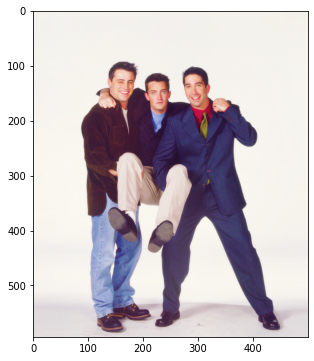

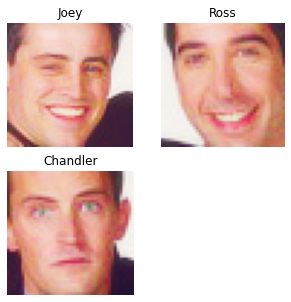

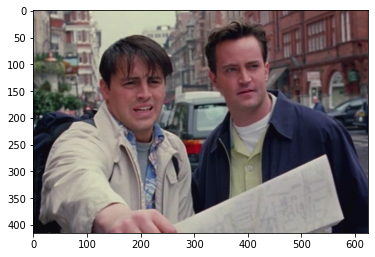

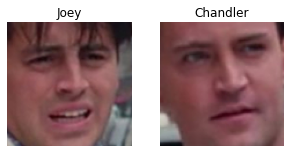

In [ ]:
import os
from imutils import paths

image_paths = list(paths.list_images(test_path))

for i, image_path in enumerate(image_paths):
    if i >= 5 and i <= 6:
        path = f'{test_path}{file}'
        show_faces_in_picture(image_path)
        # show_faces(image_path)
